In [1]:
%pylab inline
import pandas as pd

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

import NaiveDE
import SpatialDE

Populating the interactive namespace from numpy and matplotlib


In [2]:
counts = pd.read_csv('Data/Brain2_treated_hp_tissue.tsv', sep='\t',index_col=0)
counts = counts.T[counts.sum(0) >= 3].T  # Filter practically unobserved genes
print(counts.shape)
counts.iloc[:5, :5]

(43, 9324)


,ENSMUSG00000098104,ENSMUSG00000033845,ENSMUSG00000025903,ENSMUSG00000033813,ENSMUSG00000002459
24.0x14.93,0.0,0.0,0.0,0.0,0.0
25.04x13.95,0.0,0.0,0.0,0.0,0.0
25.04x14.93,0.0,0.0,0.0,0.0,0.0
25.04x15.95,0.0,0.0,0.0,0.0,0.0
26.02x13.95,0.0,0.0,0.0,0.0,0.0


In [3]:
sample_info = pd.DataFrame(0, index = counts.index, columns = ['x','y','total_counts'])
sample_info.loc[:,'x'] = [float(item.split('x')[0]) for item in sample_info.index]
sample_info.loc[:,'y'] = [float(item.split('x')[1]) for item in sample_info.index]
sample_info.loc[:,'total_counts'] = counts.sum(axis=1)
sample_info.head(5)

,x,y,total_counts
24.0x14.93,24.00,14.93,2689.0
25.04x13.95,25.04,13.95,4256.0
25.04x14.93,25.04,14.93,2591.0
25.04x15.95,25.04,15.95,5819.0
26.02x13.95,26.02,13.95,4377.0


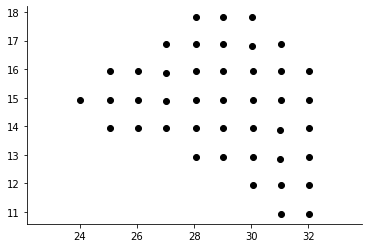

In [4]:
figsize(6, 4)
plt.scatter(sample_info['x'], sample_info['y'], c='k');
plt.axis('equal');

In [5]:
norm_expr = NaiveDE.stabilize(counts.T).T
resid_expr = NaiveDE.regress_out(sample_info, norm_expr.T, 'np.log(total_counts)').T

In [6]:
sample_resid_expr = resid_expr.sample(n=len(counts.columns), axis=1, random_state=1)

X = sample_info[['x', 'y']]
sample_resid_expr.head()
results = SpatialDE.run(X, sample_resid_expr)

In [8]:
results.head().T

,0,1,2,3,4
FSV,2.05e-09,2.05e-09,2.05e-09,2.05e-09,2.05e-09
M,4,4,4,4,4
g,ENSMUSG00000031916,ENSMUSG00000006288,ENSMUSG00000018076,ENSMUSG00000030309,ENSMUSG00000020346
l,0.425029,0.425029,0.425029,0.425029,0.425029
max_delta,4.85165e+08,4.85165e+08,4.85165e+08,4.85165e+08,4.85165e+08
max_ll,52.3206,52.9981,48.2689,52.5685,67.7861
max_mu_hat,1.63075,1.18631,1.58904,1.73607,1.73768
max_s2_t_hat,5.49191e-09,2.91097e-09,5.21727e-09,6.22268e-09,6.22891e-09
model,SE,SE,SE,SE,SE
n,43,43,43,43,43


In [9]:
results.sort_values('qval').head(5)[['g', 'l', 'pval','qval']]

,g,l,pval,qval
8009,ENSMUSG00000038807,0.976084,0.000176,0.775803
7811,ENSMUSG00000045009,0.976084,0.000250,0.775803
8212,ENSMUSG00000043518,0.976084,0.000103,0.775803
6221,ENSMUSG00000090150,0.425029,0.938744,0.938744
6220,ENSMUSG00000024941,0.425029,0.938744,0.938744


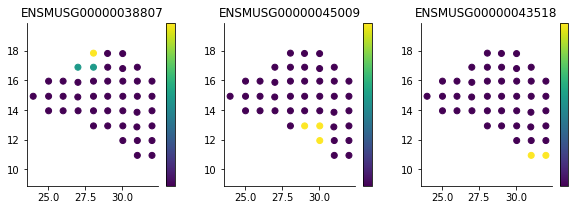

In [10]:
figsize(10, 3)
for i, g in enumerate(['ENSMUSG00000038807', 'ENSMUSG00000045009', 'ENSMUSG00000043518']):
    plt.subplot(1, 3, i + 1)
    plt.scatter(sample_info['x'], sample_info['y'], c=norm_expr[g]);
    plt.title(g)
    plt.axis('equal')


    plt.colorbar(ticks=[]);

In [11]:
results.sort_values('qval').tail(10)[['g', 'l', 'qval']]

,g,l,qval
3104,ENSMUSG00000050295,0.425029,0.938744
3105,ENSMUSG00000020849,0.425029,0.938744
3106,ENSMUSG00000056836,0.425029,0.938744
3107,ENSMUSG00000026921,0.425029,0.938744
3108,ENSMUSG00000047248,0.425029,0.938744
3109,ENSMUSG00000034621,0.425029,0.938744
3110,ENSMUSG00000021134,0.425029,0.938744
3111,ENSMUSG00000021379,0.425029,0.938744
3131,ENSMUSG00000038936,0.425029,0.938744
9323,ENSMUSG00000037126,5.147830,0.938744


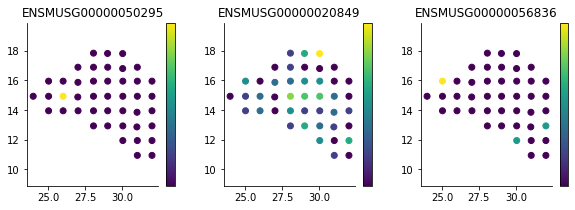

In [12]:
figsize(10, 3)
for i, g in enumerate(['ENSMUSG00000050295', 'ENSMUSG00000020849', 'ENSMUSG00000056836']):
    plt.subplot(1, 3, i + 1)
    plt.scatter(sample_info['x'], sample_info['y'], c=norm_expr[g]);
    plt.title(g)
    plt.axis('equal')


    plt.colorbar(ticks=[]);

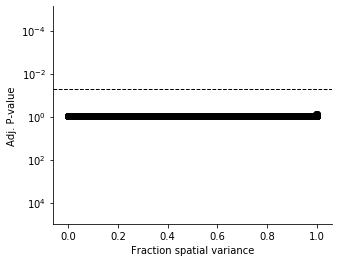

In [13]:
figsize(5, 4)
plt.yscale('log')

plt.scatter(results['FSV'], results['qval'], c='black')

plt.axhline(0.05, c='black', lw=1, ls='--');

plt.gca().invert_yaxis();
plt.xlabel('Fraction spatial variance')
plt.ylabel('Adj. P-value');